# Time Series Correlation Analysis 

This examples showcases different metrics for measuring the similarity of different time series. the examples cover Pearson and Dynamic Time Warning. 


## Key findings
- While less sophisticated, we recommend using the Pearson correlation for selecting the control group for AB test_thing or the co-variates for a causal inference study. This is because the Pearson coefficient is more snesitive to changes in frequency content (seasonality) of the time series.

In [1]:
# 
import sys, os 
from dotenv import load_dotenv
load_dotenv("../.env")
sys.path.append(os.environ.get("SRC_FOLDER"))

import pandas as pd
import matplotlib.pyplot

import numpy as np 
import matplotlib.pyplot as plt
import causalinf.th.correlation

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



# Sine Waves

We use sine waves to showcase how the different similarity metrics behave.

In [2]:
fr0 = 1.0

time = np.linspace(0,2.*np.pi,200)
test_th =  np.sin(fr0*time)

controls_th = dict(
    # same mean controls_th
    a = 0.8*np.sin(   fr0*time),
    b = 0.8*np.sin(2.*fr0*time),
    # different mean controls_th
    c = 1. + 0.8*np.sin(   fr0*time),
    d = 1. + 0.8*np.sin(2.*fr0*time),
) 

The correlation can be computed as:

In [3]:
correlations = []
for control_name, control_th in controls_th.items():
    correlations.append({
       "control": control_name,
       "pearson": round(causalinf.th.correlation.pearson(test_th, control_th)[0][0],3),
       "dtw": round(causalinf.th.correlation.dynamic_time_warping(test_th, control_th)[0][0],3)
    })
pd.DataFrame(correlations)

,control,pearson,dtw
0,a,1.0,0.032
1,b,0.0,0.158
2,c,1.0,0.446
3,d,0.0,0.479


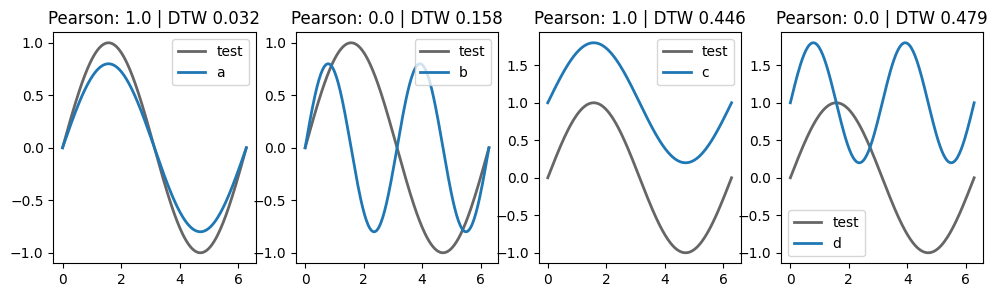

In [4]:
fig = plt.figure(figsize=(12.,3.))
Ax = fig.subplots(1,len(controls_th),squeeze=False)

for ii, control_name in enumerate(controls_th.keys()):
    Ax[0,ii].plot( time, test_th, label="test", lw=2, color="k", alpha=0.6)
    Ax[0,ii].plot( time, controls_th[control_name], label=control_name, lw=2)
    Ax[0,ii].set_title( f"""Pearson: {correlations[ii]["pearson"]} | DTW {correlations[ii]["dtw"]}"""  )
    Ax[0,ii].legend()

The shows that Pearson coefficient is maximum when there is perfect sync between test and control. This is because Pearson measures the linear correlation between the time series. This is well suited for testing applications with Synthetic Control Methods and Bayesian Structural Time Series models, which (often) employ linear combinations of a number of control (covariate) time series.

DTW, instead, is more sensitive to (1) scaling/amplitude rather than (2) the frequency content of the time series. While (1) suggests that one shoud normalise the time series before comparison, (2) suggests that DTW may lead to misleading choices when determining the control group/covariates for a test. For example, control *b* has a lower DTW, despite having a very different frequency content (seasonality) than the test time series. 